<a href="https://colab.research.google.com/github/fercouri/Fundamentos-de-Mecanica-das-Estruturas/blob/main/Q4_T1_MAC019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TRABALHO MAC019**
Prof: Tatiana Danelon

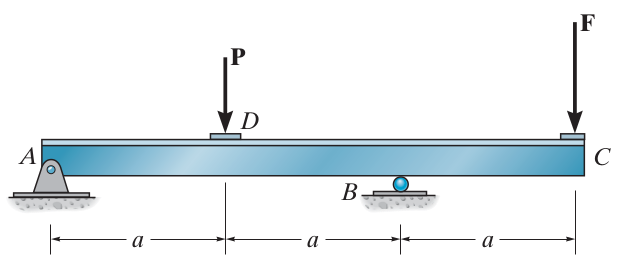

#4b:


--- Resultados de Deflexão e Rotação ---
Ponto A (x = 0.00 m - Apoio):
  Deflexão Y (vy): -0.000000e+00 m
  Rotação Z (theta_z): 7.500000e-01 rad

Ponto D (x = 1.50 m):
  Deflection Y (vy): -7.031250e-01 m
  Rotation Z (theta_z): -9.375000e-02 rad

Ponto B (x = 3.00 m - Apoio):
  Deflection Y (vy): -0.000000e+00 m
  Rotation Z (theta_z): -3.750000e-01 rad

Ponto C (x = 4.50 m):
  Deflection Y (vy): 9.111188e-16 m
  Rotation Z (theta_z): 1.875000e-01 rad



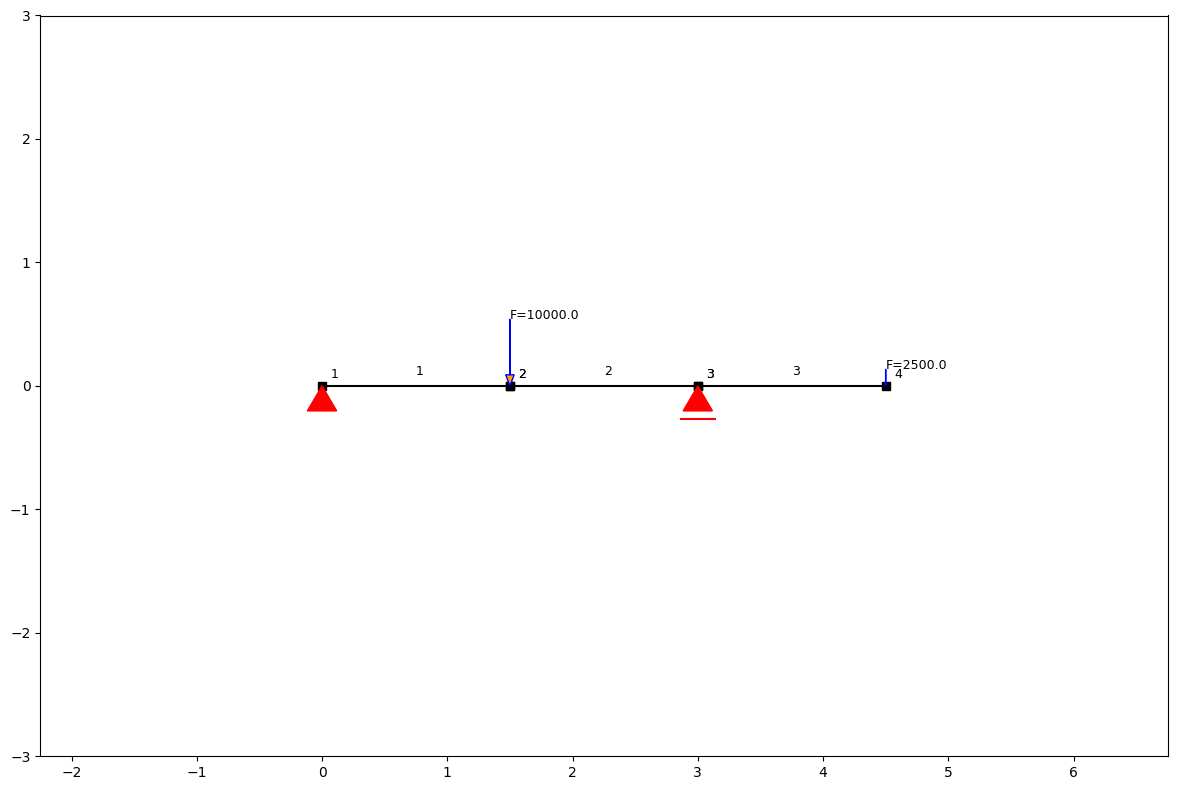

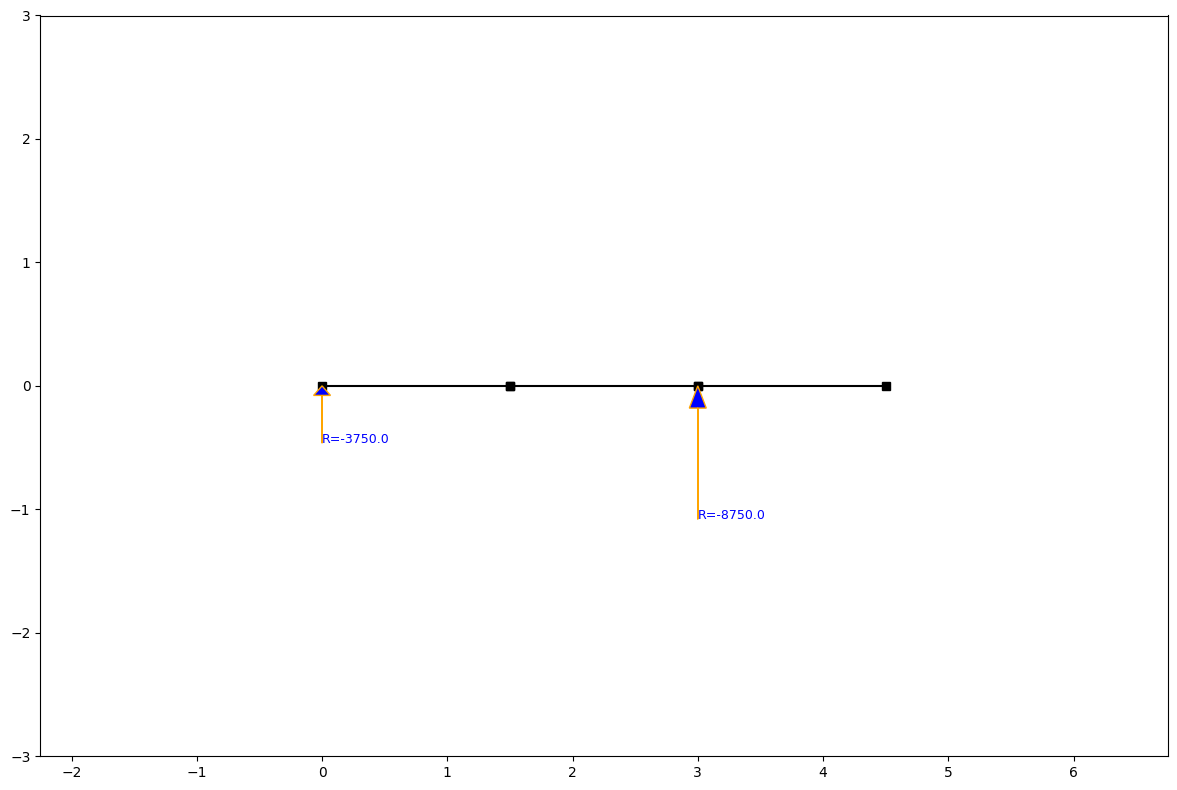

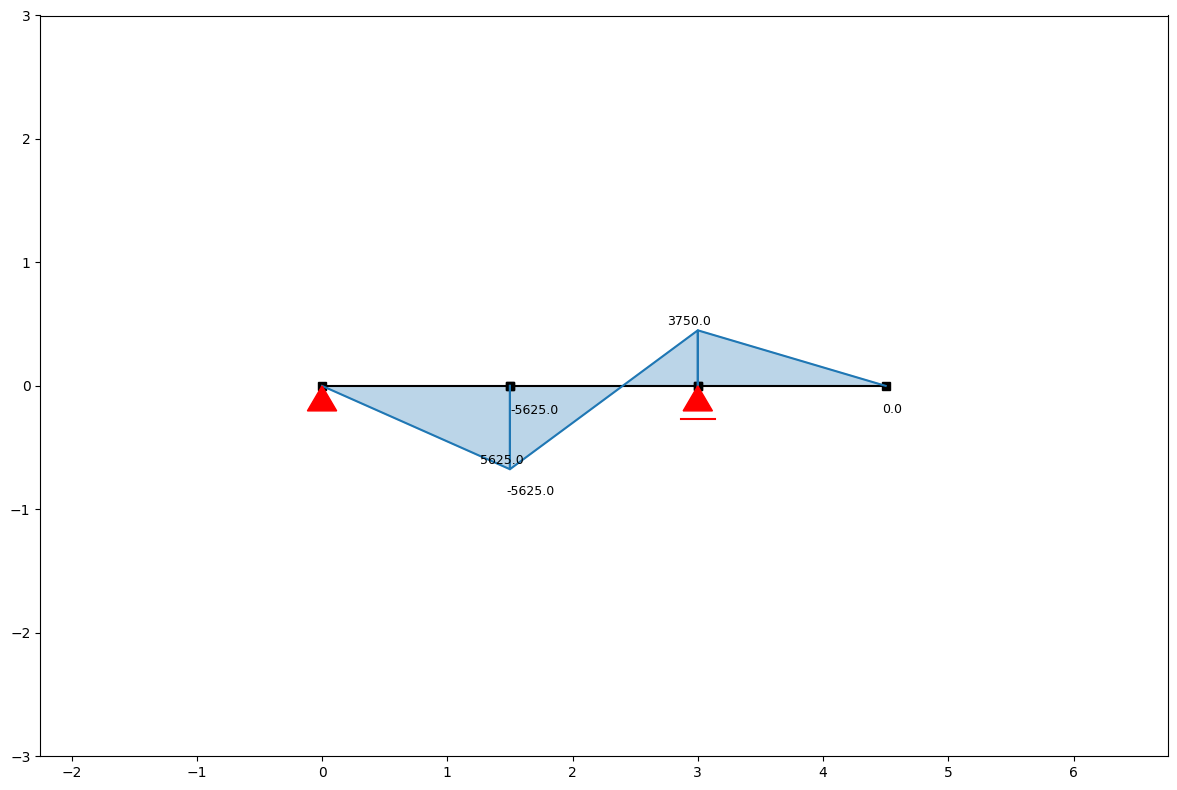

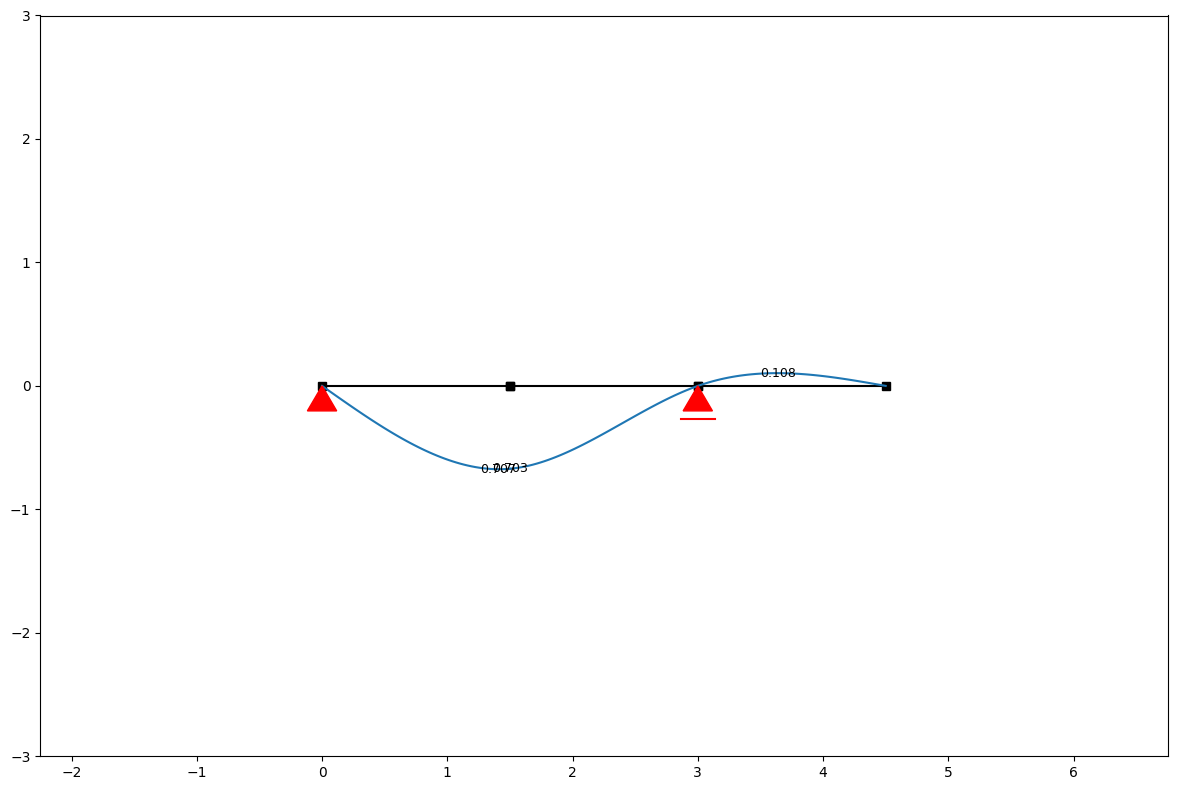

In [ ]:
!pip install anastruct
from anastruct import SystemElements

ss = SystemElements()

P = 10 * 1000 # N
F = (1 / 4) * P
E = 210*10**9  # Pa
h = 0.15
b = 0.30
I = (b* h**3) / 12
EI = E * I

# Elementos (com discretização)
ss.add_element(location=[[0, 0], [1.5, 0]])  # Carga P
ss.add_element(location=[[1.5, 0], [3.0, 0]])  # Apoio B
ss.add_element(location=[[3.0, 0], [4.5, 0]])  # Carga F

# Apoios em extremidades
ss.add_support_hinged(node_id=1)
ss.add_support_roll(node_id=3)

# Cargas
ss.point_load(node_id=2, Fy=-P)  # P = 10 kN no ponto C (x = 1.5)
ss.point_load(node_id=4, Fy=-F)  # F

# Resolver
ss.solve()

print("\n--- Resultados de Deflexão e Rotação ---")

# Ponto A
results_A = ss.get_node_displacements(node_id=1)
print(f"Ponto A (x = 0.00 m - Apoio):")
print(f"  Deflexão Y (vy): {results_A['uy']:.6e} m")
print(f"  Rotação Z (theta_z): {results_A['phi_z']:.6e} rad\n")

# Ponto D
results_D = ss.get_node_displacements(node_id=2)
print(f"Ponto D (x = 1.50 m):")
print(f"  Deflection Y (vy): {results_D['uy']:.6e} m")
print(f"  Rotation Z (theta_z): {results_D['phi_z']:.6e} rad\n")

# Ponto B
results_B = ss.get_node_displacements(node_id=3)
print(f"Ponto B (x = 3.00 m - Apoio):")
print(f"  Deflection Y (vy): {results_B['uy']:.6e} m")
print(f"  Rotation Z (theta_z): {results_B['phi_z']:.6e} rad\n")

# Ponto C
results_C = ss.get_node_displacements(node_id=4)
print(f"Ponto C (x = 4.50 m):")
print(f"  Deflection Y (vy): {results_C['uy']:.6e} m")
print(f"  Rotation Z (theta_z): {results_C['phi_z']:.6e} rad\n")


# Resultados
ss.show_structure()
ss.show_reaction_force()
ss.show_bending_moment()
ss.show_displacement()

#4c:



alpha     vD (mm)    vC (mm)    vC + vD (mm)
0.00     -1125.00    1687.50         2812.50

0.25     -1019.53    1265.62         2285.16

0.50      -914.06     843.75         1757.81

0.75      -808.59     421.88         1230.47

1.00      -703.13       0.00          703.13

1.25      -597.66    -421.87         1019.53

1.50      -492.19    -843.75         1335.94

1.75      -386.72   -1265.62         1652.34

2.00      -281.25   -1687.50         1968.75



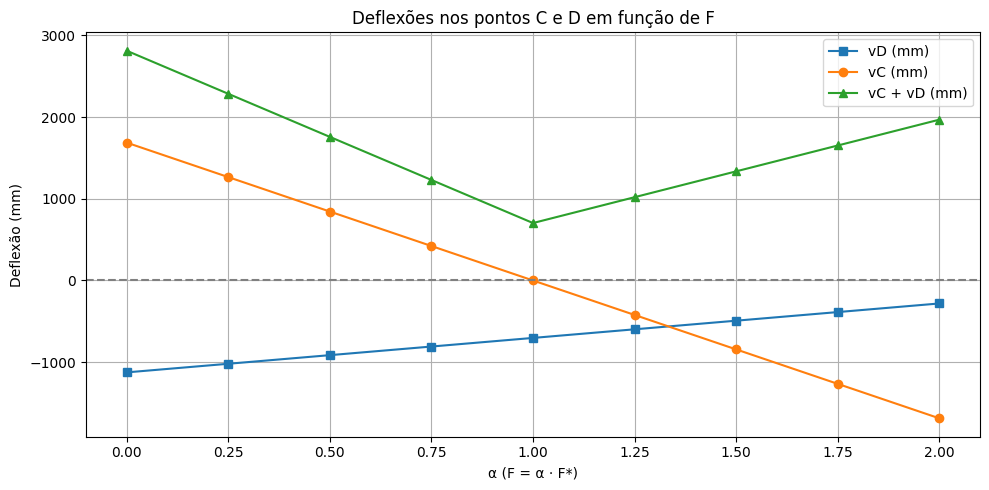

In [ ]:
!pip install anastruct
from anastruct import SystemElements
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
P = 10 * 1000
F_star = (1 / 4) * P
E = 210 * 10**9 # Pa
h = 0.15
b = 0.30
I = (b* h**3) / 12
EI = E * I

alphas = np.arange(0, 2.01, 0.25)

# Resultados
resultados = []

for alpha in alphas:
    ss = SystemElements()

    # Elementos (com discretização)
    ss.add_element(location=[[0, 0], [1.5, 0]])  # Carga P
    ss.add_element(location=[[1.5, 0], [3.0, 0]])  # Apoio B
    ss.add_element(location=[[3.0, 0], [4.5, 0]])  # Carga F

    # Apoios em extremidades
    ss.add_support_hinged(node_id=1)
    ss.add_support_roll(node_id=3)

    # Cargas
    ss.point_load(node_id=2, Fy=-P)  # carga P
    ss.point_load(node_id=4, Fy=-alpha * F_star)  # carga F = alpha·F*

    # Resolver
    ss.solve()

    # Deflexões nos pontos D e C (nós 2 e 4)
    vD = ss.get_node_displacements(node_id=2)["uy"]
    vC = ss.get_node_displacements(node_id=4)["uy"]

    resultados.append((alpha, vC, vD, abs(vC) + abs(vD)))

# Tabela
print("\n")
print(f"{'alpha':<6} {'vD (mm)':>10} {'vC (mm)':>10} {'vC + vD (mm)':>15}")
for alpha, vC, vD, soma in resultados:
    print(f"{alpha:<6.2f} {vD*1000:>10.2f} {vC*1000:>10.2f} {soma*1000:>15.2f}\n")

# Gráfico
alphas_plot = [r[0] for r in resultados]
vC_plot = [r[1]*1000 for r in resultados]
vD_plot = [r[2]*1000 for r in resultados]
soma_plot = [r[3]*1000 for r in resultados]

plt.figure(figsize=(10, 5))
plt.plot(alphas_plot, vD_plot, marker='s', label="vD (mm)")
plt.plot(alphas_plot, vC_plot, marker='o', label="vC (mm)")
plt.plot(alphas_plot, soma_plot, marker='^', label="vC + vD (mm)")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("α (F = α · F*)")
plt.ylabel("Deflexão (mm)")
plt.title("Deflexões nos pontos C e D em função de F")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()